In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import io
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import layers, models

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:


labels = ['glioma', 'meningioma', 'pituitary']

x_train = [] # training images.
y_train  = [] # training labels.


image_size = 224


for label in labels:
    trainPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training',label)
    for file in tqdm(os.listdir(trainPath)):
        image = cv2.imread(os.path.join(trainPath, file),0) # load images in gray.
        image = cv2.bilateralFilter(image, 2, 50, 50) # remove images noise.
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE) # produce a pseudocolored image.
        image = image[50:450,50:450]
        image = cv2.resize(image, (image_size, image_size)) # resize images into 150*150.
        x_train.append(image)
        y_train.append(labels.index(label))
    
    


x_train = np.array(x_train) / 255.0 # normalize Images into range 0 to 1.


print(x_train.shape)


100%|██████████| 1457/1457 [00:14<00:00, 100.71it/s]


(4117, 150, 150, 3)


In [3]:
y_train = np.array(y_train)
print(y_train.shape)

(4117,)


0


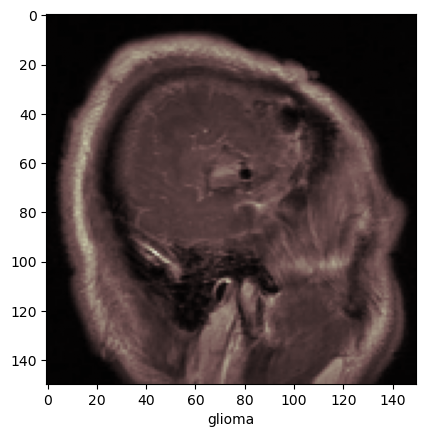

In [4]:
def plot_img(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(labels[y[index]])
    print(y[index])

plot_img(x_train,y_train,0)

1


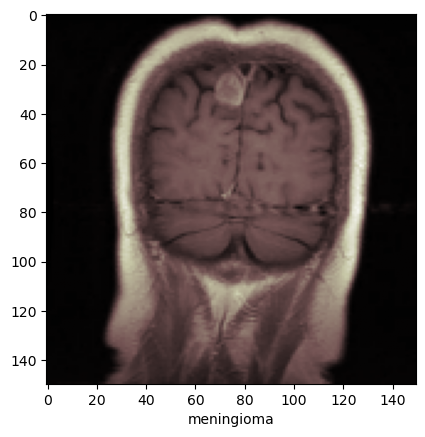

In [5]:
plot_img(x_train,y_train,2342)

In [6]:
ANN =models.Sequential([
    layers.Flatten(input_shape=(150,150,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(3,activation='sigmoid')
])
ANN.compile(
     optimizer= 'SGD',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
ANN.fit(x_train,y_train,epochs=10,batch_size=16)

Epoch 1/10
258/258 [==============================] - 9s 18ms/step - loss: 0.7814 - accuracy: 0.6225
Epoch 2/10
258/258 [==============================] - 4s 17ms/step - loss: 0.6098 - accuracy: 0.7233
Epoch 3/10
258/258 [==============================] - 4s 17ms/step - loss: 0.5408 - accuracy: 0.7656
Epoch 4/10
258/258 [==============================] - 5s 17ms/step - loss: 0.4707 - accuracy: 0.8001
Epoch 5/10
258/258 [==============================] - 4s 17ms/step - loss: 0.4140 - accuracy: 0.8305
Epoch 6/10
258/258 [==============================] - 4s 17ms/step - loss: 0.3564 - accuracy: 0.8569
Epoch 7/10
258/258 [==============================] - 4s 17ms/step - loss: 0.3124 - accuracy: 0.8764
Epoch 8/10
258/258 [==============================] - 5s 18ms/step - loss: 0.2747 - accuracy: 0.8965
Epoch 9/10
258/258 [==============================] - 4s 17ms/step - loss: 0.2293 - accuracy: 0.9150
Epoch 10/10
258/258 [==============================] - 4s 17ms/step - loss: 0.2050 - accura

In [7]:
ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 3000)              202503000 
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 3)                 3003      
                                                                 
Total params: 205,507,003
Trainable params: 205,507,003
Non-trainable params: 0
_________________________________________________________________


In [8]:
cnn =models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',
                  input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(3,activation='softmax')
])
cnn.compile(
     optimizer= 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
129/129 [==============================] - 7s 15ms/step - loss: 0.5850 - accuracy: 0.7401
Epoch 2/10
129/129 [==============================] - 2s 14ms/step - loss: 0.3066 - accuracy: 0.8817
Epoch 3/10
129/129 [==============================] - 2s 13ms/step - loss: 0.1926 - accuracy: 0.9266
Epoch 4/10
129/129 [==============================] - 2s 14ms/step - loss: 0.1046 - accuracy: 0.9653
Epoch 5/10
129/129 [==============================] - 2s 15ms/step - loss: 0.0602 - accuracy: 0.9815
Epoch 6/10
129/129 [==============================] - 2s 15ms/step - loss: 0.0294 - accuracy: 0.9934
Epoch 7/10
129/129 [==============================] - 2s 13ms/step - loss: 0.0127 - accuracy: 0.9983
Epoch 8/10
129/129 [==============================] - 2s 14ms/step - loss: 0.0254 - accuracy: 0.9932
Epoch 9/10
129/129 [==============================] - 2s 13ms/step - loss: 0.0140 - accuracy: 0.9971
Epoch 10/10
129/129 [==============================] - 2s 14ms/step - loss: 0.0039 - accura

In [13]:
x_test = [] # testing images.
y_test = [] # testing labels.
for label in labels:
    testPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing',label)
    for file in tqdm(os.listdir(testPath)):
        image = cv2.imread(os.path.join(testPath, file),0)
        image = cv2.bilateralFilter(image, 2, 50, 50)
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE)
        image = image[50:450,50:450]
        image = cv2.resize(image, (image_size, image_size))
        x_test.append(image)
        y_test.append(labels.index(label))
    

    

        
x_test = np.array(x_test) / 255.0  # normalize Images into range 0 to 1.

print(x_test.shape)

100%|██████████| 300/300 [00:01<00:00, 231.96it/s]


(906, 150, 150, 3)


In [14]:
y_test=np.array(y_test)


In [15]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_3 (Dense)             (None, 3)                

In [16]:
cnn.evaluate(x_test,y_test)

29/29 [==============================] - 0s 9ms/step - loss: 0.2253 - accuracy: 0.9481


[0.22531604766845703, 0.9481236338615417]

In [17]:
ANN.evaluate(x_test,y_test)

29/29 [==============================] - 0s 10ms/step - loss: 0.6055 - accuracy: 0.7781


[0.6055120825767517, 0.7781456708908081]